In [7]:
import time
import torch as th
import matplotlib.pyplot as plt
import os
import sys
from append_directories import *
data_generation_folder = (append_directory(3) + "/generate_data")
sys.path.append(data_generation_folder)
from twisted_diffusion_data_generation_functions import *
from true_conditional_data_generation import *

In [32]:
1.25*twisted_diffusion.sigmas_cumprod[100]

1.1266100669123285

In [10]:
replicates_per_call = 32
n = 32
ess_threshold = .5
device = "cuda:0"

In [11]:
minX = -10
maxX = 10
minY = -10
maxY = 10
n = 32
variance = .4
lengthscale = 1.6
number_of_replicates = 1
seed_value = 43423
ref_img = generate_true_conditional_samples.generate_gaussian_process(minX, maxX,
                                                                      minY, maxY,
                                                                      n, variance,
                                                                      lengthscale,
                                                                      number_of_replicates,
                                                                      seed_value)
ref_img = th.from_numpy(ref_img[1].reshape((1,n,n))).to(device)
mask = th.ones((1,n,n)).to(device)
mask[:, int(n/4):int(n/4*3), int(n/4):int(n/4*3)] = 0
mask = mask.bool()

In [ ]:

ncs_samples = twisted_diffusion_samples_per_call(twisted_diffusion, replicates_per_call,
                                       mask, ref_img, n, ess_threshold)

In [13]:
def plot_spatial_field(image,n, mask):
    image = image.detach().cpu().numpy()
    image = image.reshape((n,n))
    mask = (mask.detach().float().cpu().numpy()).reshape((n,n))
    plt.imshow(image, vmin = -2, vmax = 2, alpha = (1-mask))
    plt.show()

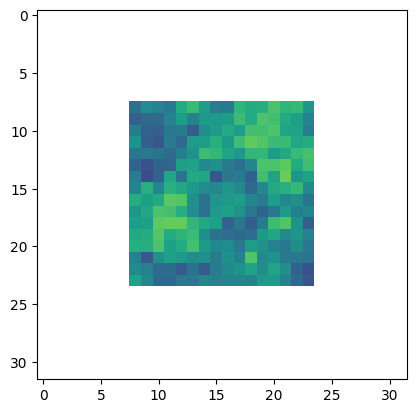

In [14]:
n = 32
plot_spatial_field((ncs_samples[0])[9,:,:], n, mask)

In [25]:
(ncs_samples[4])[240:250,:]

tensor([[ 1,  1,  6, 18, 18, 18, 18, 18, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
         21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 29, 29],
        [19, 19, 19, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
         28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28],
        [ 3,  3,  3,  3,  3,  3, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 31, 31],
        [ 9,  9,  9,  9,  9,  9,  9, 20, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
         29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29],
        [ 2,  2,  7, 14, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 30],
        [ 1,  1, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
         27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27],
        [ 0,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6, 

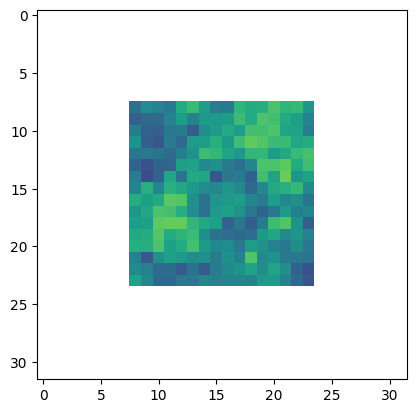

In [20]:
plot_spatial_field((ncs_samples[0])[15,:,:], n, mask)